In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [36]:
apps = pd.read_csv("apps.csv",usecols=["id","title","description"], encoding='latin-1')
apps = apps.rename(columns={"id": "app_id"})
apps['title'] = apps['title'].str.strip()
Ratings = pd.read_csv("reviews.csv",usecols=['author','app_id','rating'])
# drop missing values
ratings_dropna = Ratings.dropna()
# count average ratings for users rating the same app several times
Rating_avg = ratings_dropna.groupby(["author","app_id"],as_index=False)['rating'].mean()

In [37]:
apps.head()

,app_id,title,description
0,1,Hit Counter,Show off your site traffic using Hit Counter f...
1,2,Categories Uncomplicated,Simple categories for Shopify collections \n O...
2,3,Ads by Varinode,"For a limited time, all new installs will rece..."
3,4,All in One Metafields,Simple & Easy To Use \n Custom meta fields for...
4,5,Product Options and Customizer,FREE Installation Service. Just follow these 3...


In [72]:
Rating_avg

,author,app_id,rating,normalized_rating
0,"""Accountable Clothing""",420,3.0,0.0
1,"""All Things Rugby""",1060,4.0,0.0
2,"""All Things Rugby""",1836,4.0,0.0
3,"""Interchangeable Necklaces"" by Bead Dangle Design",808,3.0,0.0
4,"""Shiha"" - outerwear store",170,5.0,0.0
5,"""Shiha"" - outerwear store",222,5.0,0.0
6,"""Shiha"" - outerwear store",227,5.0,0.0
7,"""Shiha"" - outerwear store",954,5.0,0.0
8,"""Sova"" Man's Store",170,5.0,0.0
9,"""Sova"" Man's Store",222,5.0,0.0


In [39]:
# Average ratings for each APP
Rating_avg.groupby('app_id')['rating'].mean().sort_values(ascending=False).head()

app_id
1654    5.0
1361    5.0
1399    5.0
2072    5.0
1401    5.0
Name: rating, dtype: float64

In [40]:
# Total number of reviews for each APP
Rating_avg.groupby('app_id')['rating'].count().sort_values(ascending=False).head()

app_id
595     20510
570      8220
780      5551
427      5118
1072     4532
Name: rating, dtype: int64

In [69]:
ratings_mean_count = pd.DataFrame(Rating_avg.groupby('app_id')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(Rating_avg.groupby('app_id')['rating'].count())
ratings_mean_count = ratings_mean_count.rename(columns={"rating": "avg_rating"})
ratings_mean_count_sub = ratings_mean_count[ratings_mean_count['rating_counts'] <= 500]
ratings_mean_count.head()

,avg_rating,rating_counts
app_id,,
1,4.384615,39
2,4.970588,34
3,4.895084,3336
4,4.909091,11
5,4.314286,70


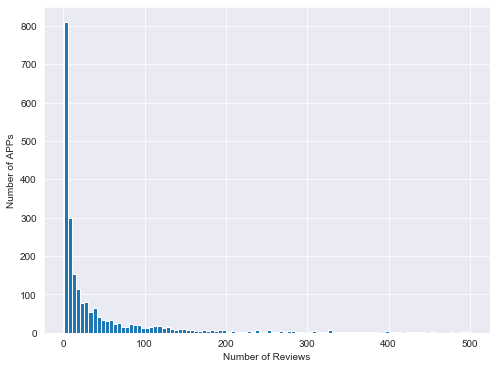

In [70]:
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.xlabel("Number of Reviews")
plt.ylabel("Number of APPs")
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count_sub['rating_counts'].hist(bins=100)

In [43]:
# normalize ratings
from sklearn.preprocessing import minmax_scale
Rating_avg['normalized_rating'] = Rating_avg.groupby('author').rating.transform(lambda x: minmax_scale(x.astype(float)))
nor_ratings_mean_count = pd.DataFrame(Rating_avg.groupby('app_id')['normalized_rating'].mean())
nor_ratings_mean_count['rating_counts'] = pd.DataFrame(Rating_avg.groupby('app_id')['normalized_rating'].count())
#ratings_mean_count_sub = ratings_mean_count[ratings_mean_count['rating_counts'] >= 10]
nor_ratings_mean_count.head()

,normalized_rating,rating_counts
app_id,,
1,0.064103,39
2,0.117647,34
3,0.108039,3336
4,0.090909,11
5,0.117857,70


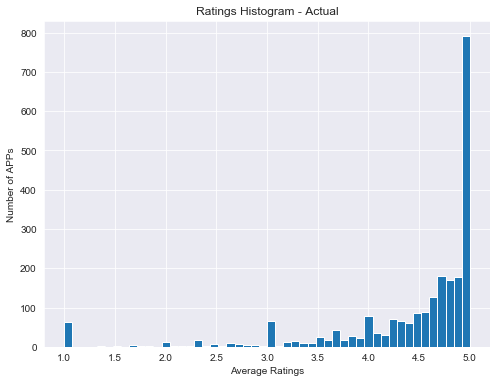

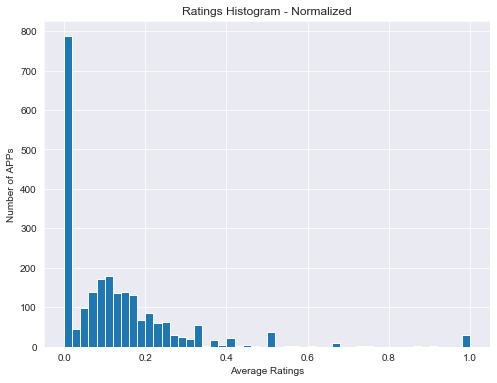

In [59]:
plt.figure(figsize=(8,6))
plt.xlabel("Average Ratings")
plt.ylabel("Number of APPs")
plt.title("Ratings Histogram - Actual")
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['avg_rating'].hist(bins=50)

plt.figure(figsize=(8,6))
plt.xlabel("Average Ratings")
plt.ylabel("Number of APPs")
plt.title("Ratings Histogram - Normalized")
plt.rcParams['patch.force_edgecolor'] = True
nor_ratings_mean_count['normalized_rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

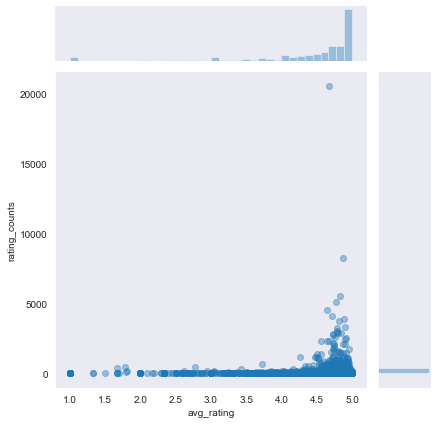

<Figure size 576x432 with 0 Axes>

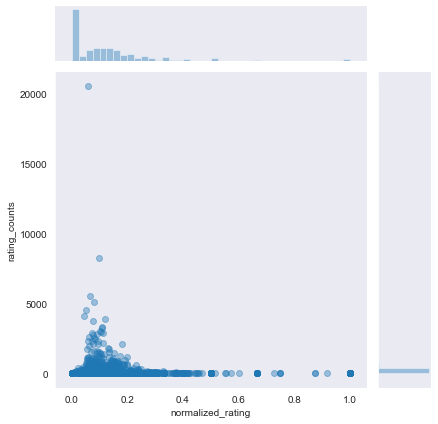

In [63]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='avg_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='normalized_rating', y='rating_counts', data=nor_ratings_mean_count, alpha=0.4)

In [11]:
# Filter out rating in 2019
# Filter out number of reviews
subset = Rating_avg[Rating_avg['posted_at'] >= '2019-01-01']
subset = subset.groupby("app_id").filter(lambda x: len(x) >= 100)
# Ramdom Sampling
subset = subset.sample(n=15000, random_state=0)
# assign user id
subset = subset.assign(user_id=(subset['author']).astype('category').cat.codes)

In [12]:
final = pd.pivot_table(subset,values='rating_x',index='user_id',columns='app_id')
final.head()

app_id,3,35,54,57,63,174,175,196,205,295,...,2376,2405,2423,2457,2477,2569,2586,2730,2740,2765
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# calculate sparsity
from numpy import count_nonzero
data_matrix_fillna = final.fillna(0)
sparsity = 1.0 - count_nonzero(data_matrix_fillna) / data_matrix_fillna.size

print("Number of Rated Cells: " + str(count_nonzero(data_matrix_fillna)))
print("Number of All Cells: " + str(data_matrix_fillna.size))
print("Sparsity:" + str(sparsity))

Number of Rated Cells: 14993
Number of All Cells: 1401981
Sparsity:0.9893058465128985


In [14]:
# Replacing NaN by Movie Average
final_app = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [15]:
# calculate the number of unique users and apps
n_users = subset.user_id.unique().shape[0]
n_items = subset.app_id.unique().shape[0]
print("Number of unique users:", n_users)
print("Number of unique APPs:",n_items)

Number of unique users: 13881
Number of unique APPs: 101


In [16]:
final_app.head()

app_id,3,35,54,57,63,174,175,196,205,295,...,2376,2405,2423,2457,2477,2569,2586,2730,2740,2765
user_id,,,,,,,,,,,,,,,,,,,,,
0,4.947781,4.653061,4.940299,4.791667,4.524272,4.615385,4.944882,4.60274,4.615385,4.55665,...,4.736462,4.677419,4.792683,4.684583,4.587459,4.887097,4.611374,3.128205,4.278689,4.885246
1,4.947781,4.653061,4.940299,4.791667,4.524272,4.615385,4.944882,4.60274,4.615385,4.55665,...,4.736462,4.677419,4.792683,4.684583,4.587459,4.887097,4.611374,3.128205,4.278689,4.885246
2,4.947781,4.653061,4.940299,4.791667,4.524272,4.615385,4.944882,4.60274,4.615385,4.55665,...,4.736462,4.677419,4.792683,4.684583,4.587459,4.887097,4.611374,3.128205,4.278689,4.885246
3,4.947781,4.653061,4.940299,4.791667,4.524272,4.615385,4.944882,4.60274,4.615385,4.55665,...,4.736462,4.677419,4.792683,4.684583,5.000000,4.887097,4.611374,3.128205,4.278689,4.885246
4,4.947781,4.653061,4.940299,4.791667,4.524272,4.615385,4.944882,5.00000,4.615385,4.55665,...,4.736462,4.677419,4.792683,4.684583,4.587459,4.887097,4.611374,3.128205,4.278689,4.885246


In [17]:
final_user.head()

app_id,3,35,54,57,63,174,175,196,205,295,...,2376,2405,2423,2457,2477,2569,2586,2730,2740,2765
user_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [18]:
# user similarity on replacing NAN by item(app) avg
cosine = cosine_similarity(final_app)
np.fill_diagonal(cosine, 0)
similarity_with_app = pd.DataFrame(cosine,index=final_app.index)
similarity_with_app.columns = final_user.index
similarity_with_app.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,13871,13872,13873,13874,13875,13876,13877,13878,13879,13880
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.999841,0.999846,0.999819,0.999822,0.999775,0.999748,0.999747,0.999842,0.999806,...,0.999712,0.996891,0.999855,0.999856,0.999833,0.999824,0.996728,0.999841,1.000000,0.999835
1,0.999841,0.000000,0.999973,0.999945,0.999948,0.999906,0.999879,0.999878,0.999969,0.999932,...,0.999844,0.997036,0.999983,0.999984,0.999959,0.999950,0.996874,0.999967,0.999841,0.999962
2,0.999846,0.999973,0.000000,0.999951,0.999954,0.999912,0.999885,0.999884,0.999975,0.999938,...,0.999773,0.997041,0.999989,0.999990,0.999965,0.999956,0.996879,0.999973,0.999846,0.999968
3,0.999819,0.999945,0.999951,0.000000,0.999925,0.999773,0.999858,0.999856,0.999946,0.999909,...,0.999822,0.996335,0.999961,0.999961,0.999937,0.999927,0.996854,0.999945,0.999819,0.999939
4,0.999822,0.999948,0.999954,0.999925,0.000000,0.999887,0.999860,0.999859,0.999949,0.999912,...,0.999825,0.997018,0.999963,0.999964,0.999940,0.999930,0.996856,0.999948,0.999822,0.999942


In [19]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [20]:
# top 30 neighbours for each user
sim_user_30 = find_n_neighbours(similarity_with_app,30)
sim_user_30.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
0,11820,11651,1792,3275,8693,4953,11205,9988,5642,8957,...,1927,4448,4470,6305,9463,13658,6415,5090,4283,13197
1,9440,5588,3211,3197,11093,3103,772,9265,7080,1223,...,6834,1385,2868,7826,941,1846,5566,11275,9460,12198
2,723,3880,8818,1180,7149,11804,3829,3831,3848,3852,...,7029,7025,8147,11617,13486,1190,8935,3636,3519,3570
3,4130,3234,3324,13701,23,4972,4540,4250,8341,4873,...,13668,8953,11005,12586,3669,4725,12036,2830,12310,5804
4,13763,9285,13726,5118,8419,61,6327,5704,11136,3527,...,5703,1246,9982,10052,531,4233,11872,10109,5300,2026


In [28]:
import turicreate
train_data = turicreate.SFrame(subset)
#Training the model
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='app_id', target='rating_x', similarity_type='cosine')

Warning: Ignoring columns author, posted_at, rating_y;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 15000 observations with 13881 users and 101 items.

Data prepared in: 0.159317s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 13.142ms                       | 14.25      |

| 18.258ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 35.316ms                            | 0                | 0               |

| 48.788ms                            | 100              | 101             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.072s

In [29]:
#Making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

+---------+--------+----------------------+------+
| user_id | app_id |        score         | rank |
+---------+--------+----------------------+------+
|    1    |  427   | 0.07844418287277222  |  1   |
|    1    |  1821  | 0.07213830947875977  |  2   |
|    1    |  457   |  0.0660887360572815  |  3   |
|    1    |  575   | 0.059626102447509766 |  4   |
|    1    |  680   | 0.046562254428863525 |  5   |
|    2    |  1773  | 0.06918519735336304  |  1   |
|    2    |  1403  | 0.05919337272644043  |  2   |
|    2    |  1117  | 0.05606740713119507  |  3   |
|    2    |  1836  | 0.05560249090194702  |  4   |
|    2    |  1030  | 0.05470395088195801  |  5   |
|    3    |  1461  | 0.08591622114181519  |  1   |
|    3    |  2017  | 0.07982254028320312  |  2   |
|    3    |  457   | 0.07832080125808716  |  3   |
|    3    |  1069  | 0.06391584873199463  |  4   |
|    3    |  652   | 0.06338387727737427  |  5   |
|    4    |  652   | 0.09134799242019653  |  1   |
|    4    |   54   | 0.05437850